In [1]:
import pandas as pd

In [21]:
df = pd.read_csv('C:/Users/pablo/Downloads/MICRODADOS_ENEM_2023_trabalhado.csv/MICRODADOS_ENEM_2023_trabalhado.csv')

In [4]:
# visualizar as primeiras linhas do dataset
print(df.head())
print(df.info())
print(df.describe())

   TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  TP_NACIONALIDADE  \
0                6       F                1            1                 1   
1                2       F                1            3                 1   
2                3       F                1            3                 1   
3               11       M                1            1                 1   
4                8       M                1            3                 1   

   TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  ...  \
0                1                0          1        NaN             0  ...   
1                2                0          2        1.0             0  ...   
2                2                0          2        1.0             0  ...   
3                1                8          1        NaN             0  ...   
4                1                5          1        NaN             0  ...   

   Q016 Q017  Q018 Q019  Q020  Q021  Q022  Q023  Q

In [5]:
# criando nova coluna para regiões
estado_para_regiao = {
    'AC': 'Norte', 'AP': 'Norte', 'AM': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste',
    'PE': 'Nordeste', 'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    'PR': 'Sul', 'SC': 'Sul', 'RS': 'Sul',
    'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste', 'DF': 'Centro-Oeste'
}

# Adicionar a coluna "REGIAO" usando .replace()
df['REGIAO'] = df['SG_UF_ESC'].replace(estado_para_regiao).fillna('Não preenchido')

# Imprime o resultado
print(df['REGIAO'])

0          Não preenchido
1                Nordeste
2                Nordeste
3          Não preenchido
4          Não preenchido
                ...      
2166838    Não preenchido
2166839    Não preenchido
2166840               Sul
2166841    Não preenchido
2166842    Não preenchido
Name: REGIAO, Length: 2166843, dtype: object


In [6]:
# Craindo uma nova coluna para sexo
df['SEXO'] = df['TP_SEXO'].map({'F': 'Feminino', 'M': 'Masculino'})

print(df['SEXO'])

0           Feminino
1           Feminino
2           Feminino
3          Masculino
4          Masculino
             ...    
2166838    Masculino
2166839     Feminino
2166840    Masculino
2166841    Masculino
2166842    Masculino
Name: SEXO, Length: 2166843, dtype: object


In [7]:
# criando nova coluna para tipo de escola
df['TIPO_ESCOLA'] = df['TP_DEPENDENCIA_ADM_ESC'].map({1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4: 'Privada'})

# Imprime o resultado
print(df['TIPO_ESCOLA'])

0               NaN
1          Estadual
2          Estadual
3               NaN
4               NaN
             ...   
2166838         NaN
2166839         NaN
2166840    Estadual
2166841         NaN
2166842         NaN
Name: TIPO_ESCOLA, Length: 2166843, dtype: object


In [8]:
# Cálculo da média das notas
regiao = df.groupby('REGIAO')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()

sexo = df.groupby('SEXO')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()

tipo_escola = df.groupby('TIPO_ESCOLA')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()

# Exibe o resultado
display(regiao)
display(sexo)
display(tipo_escola)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
REGIAO,,,,,
Centro-Oeste,501.081565,528.033030,522.704735,544.604885,646.006484
Nordeste,479.928798,505.668010,502.355750,518.004973,622.938822
Norte,475.627750,502.909298,498.912463,501.264370,609.378934
Não preenchido,496.339199,527.038391,519.717118,524.712010,617.162930
Sudeste,515.049410,546.342053,539.793973,578.422838,668.699714
Sul,510.343406,542.020086,537.315366,567.327927,644.726231


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
SEXO,,,,,
Feminino,488.697101,523.163019,519.065899,514.963937,643.167063
Masculino,509.614425,532.911263,522.682050,558.710997,599.292981


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
TIPO_ESCOLA,,,,,
Estadual,471.117063,500.903230,500.962766,502.294344,578.728461
Federal,531.156656,562.034335,551.471831,602.806984,727.519228
Municipal,482.813203,513.339078,510.351475,519.515141,590.144033
Privada,549.445419,575.578812,561.208844,632.445599,764.742293


In [9]:
# Cálculo da mediana
regiao = df.groupby('REGIAO')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].median()

sexo = df.groupby('SEXO')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].median()

tipo_escola = df.groupby('TIPO_ESCOLA')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].median()

# Exibe o resultado
display(regiao)
display(sexo)
display(tipo_escola)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
REGIAO,,,,,
Centro-Oeste,500.2,535.10,527.7,538.4,640.0
Nordeste,475.0,509.60,506.0,499.8,640.0
Norte,472.5,507.05,502.6,483.8,620.0
Não preenchido,492.5,532.60,522.6,509.5,600.0
Sudeste,516.2,554.00,545.2,583.6,680.0
Sul,514.1,549.60,542.6,571.5,640.0


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
SEXO,,,,,
Feminino,483.4,527.9,521.8,498.6,640.0
Masculino,512.1,541.9,528.8,556.9,600.0


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
TIPO_ESCOLA,,,,,
Estadual,471.9,508.40,507.2,491.80,600.0
Federal,536.9,571.00,557.8,615.60,760.0
Municipal,482.6,522.35,518.1,514.65,600.0
Privada,553.5,584.10,567.6,648.30,800.0


In [10]:
# cálculo do desvio padrão
regiao = df.groupby('REGIAO')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].std()

sexo = df.groupby('SEXO')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].std()

tipo_escola = df.groupby('TIPO_ESCOLA')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].std()

# Exibe o resultado
display(regiao)
display(sexo)
display(tipo_escola)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
REGIAO,,,,,
Centro-Oeste,87.680822,84.649912,72.292177,132.140561,209.805677
Nordeste,84.577657,89.622830,78.229381,129.502987,243.403983
Norte,81.790913,86.986635,75.317969,119.545619,231.670361
Não preenchido,88.836040,88.745298,75.341163,131.171602,204.279560
Sudeste,86.038142,80.976169,67.655095,130.566231,194.236557
Sul,88.649418,78.753548,67.013635,131.039627,189.001924


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
SEXO,,,,,
Feminino,84.745534,85.819672,73.509172,126.018185,206.224567
Masculino,92.142148,91.030732,77.324436,136.870019,210.082247


,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
TIPO_ESCOLA,,,,,
Estadual,77.240232,80.927952,70.771826,115.037966,216.307095
Federal,78.400918,77.316447,65.473681,121.552426,170.745559
Municipal,79.850807,83.721277,72.725604,120.480535,202.198464
Privada,84.059042,76.098478,65.506584,124.405147,161.195182


In [11]:
# cálculo dos quartis
regiao = df.groupby('REGIAO')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].quantile([0.25, 0.5, 0.75])

sexo = df.groupby('SEXO')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].quantile([0.25, 0.5, 0.75])

tipo_escola = df.groupby('TIPO_ESCOLA')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].quantile([0.25, 0.5, 0.75])

# Exibe o resultado
display(regiao)
display(sexo)
display(tipo_escola)

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
REGIAO                                                                
Centro-Oeste   0.25       445.7      475.30       478.5      440.80   
               0.50       500.2      535.10       527.7      538.40   
               0.75       556.6      587.50       573.2      643.00   
Nordeste       0.25       423.6      443.00       451.2      413.60   
               0.50       475.0      509.60       506.0      499.80   
               0.75       534.9      570.10       557.4      612.70   
Norte          0.25       423.0      444.70       451.0      409.40   
               0.50       472.5      507.05       502.6      483.80   
               0.75       529.1      563.90       551.1      582.60   
Não preenchido 0.25       440.1      469.90       471.6      423.10   
               0.50       492.5      532.60       522.6      509.50   
               0.75       550.5      588.70       571.5      616.60   
Sudeste        0.25       459.6      499.60       499.6      480.00   
               0.50       516.2      554.00       545.2      583.60   
               0.75       569.7      602.00       586.4      675.20   
Sul            0.25       459.1      495.80       497.3      473.30   
               0.50       514.1      549.60       542.6      571.50   
               0.75       565.5      596.50       583.7      663.25   

                     NU_NOTA_REDACAO  
REGIAO                                
Centro-Oeste   0.25            540.0  
               0.50            640.0  
               0.75            820.0  
Nordeste       0.25            500.0  
               0.50            640.0  
               0.75            820.0  
Norte          0.25            480.0  
               0.50            620.0  
               0.75            800.0  
Não preenchido 0.25            500.0  
               0.50            600.0  
               0.75            760.0  
Sudeste        0.25            560.0  
               0.50            680.0  
               0.75            820.0  
Sul            0.25            540.0  
               0.50            640.0  
               0.75            780.0

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
SEXO                                                             
Feminino  0.25       434.8       467.7       471.8       417.6   
          0.50       483.4       527.9       521.8       498.6   
          0.75       540.4       582.7       569.7       602.1   
Masculino 0.25       452.4       475.9       474.8       451.9   
          0.50       512.1       541.9       528.8       556.9   
          0.75       566.5       597.0       576.7       659.9   

                NU_NOTA_REDACAO  
SEXO                             
Feminino  0.25            520.0  
          0.50            640.0  
          0.75            800.0  
Masculino 0.25            500.0  
          0.50            600.0  
          0.75            740.0

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
TIPO_ESCOLA                                                        
Estadual    0.25     424.600     448.100     457.300     414.700   
            0.50     471.900     508.400     507.200     491.800   
            0.75     522.400     558.900     550.900     584.500   
Federal     0.25     481.025     519.300     513.000     518.300   
            0.50     536.900     571.000     557.800     615.600   
            0.75     582.400     614.700     597.100     690.775   
Municipal   0.25     432.500     461.000     465.575     425.400   
            0.50     482.600     522.350     518.100     514.650   
            0.75     536.400     572.025     560.700     609.025   
Privada     0.25     495.800     533.700     523.200     550.700   
            0.50     553.500     584.100     567.600     648.300   
            0.75     603.800     627.100     606.300     720.000   

                  NU_NOTA_REDACAO  
TIPO_ESCOLA                        
Estadual    0.25            480.0  
            0.50            600.0  
            0.75            720.0  
Federal     0.25            620.0  
            0.50            760.0  
            0.75            860.0  
Municipal   0.25            500.0  
            0.50            600.0  
            0.75            720.0  
Privada     0.25            660.0  
            0.50            800.0  
            0.75            900.0

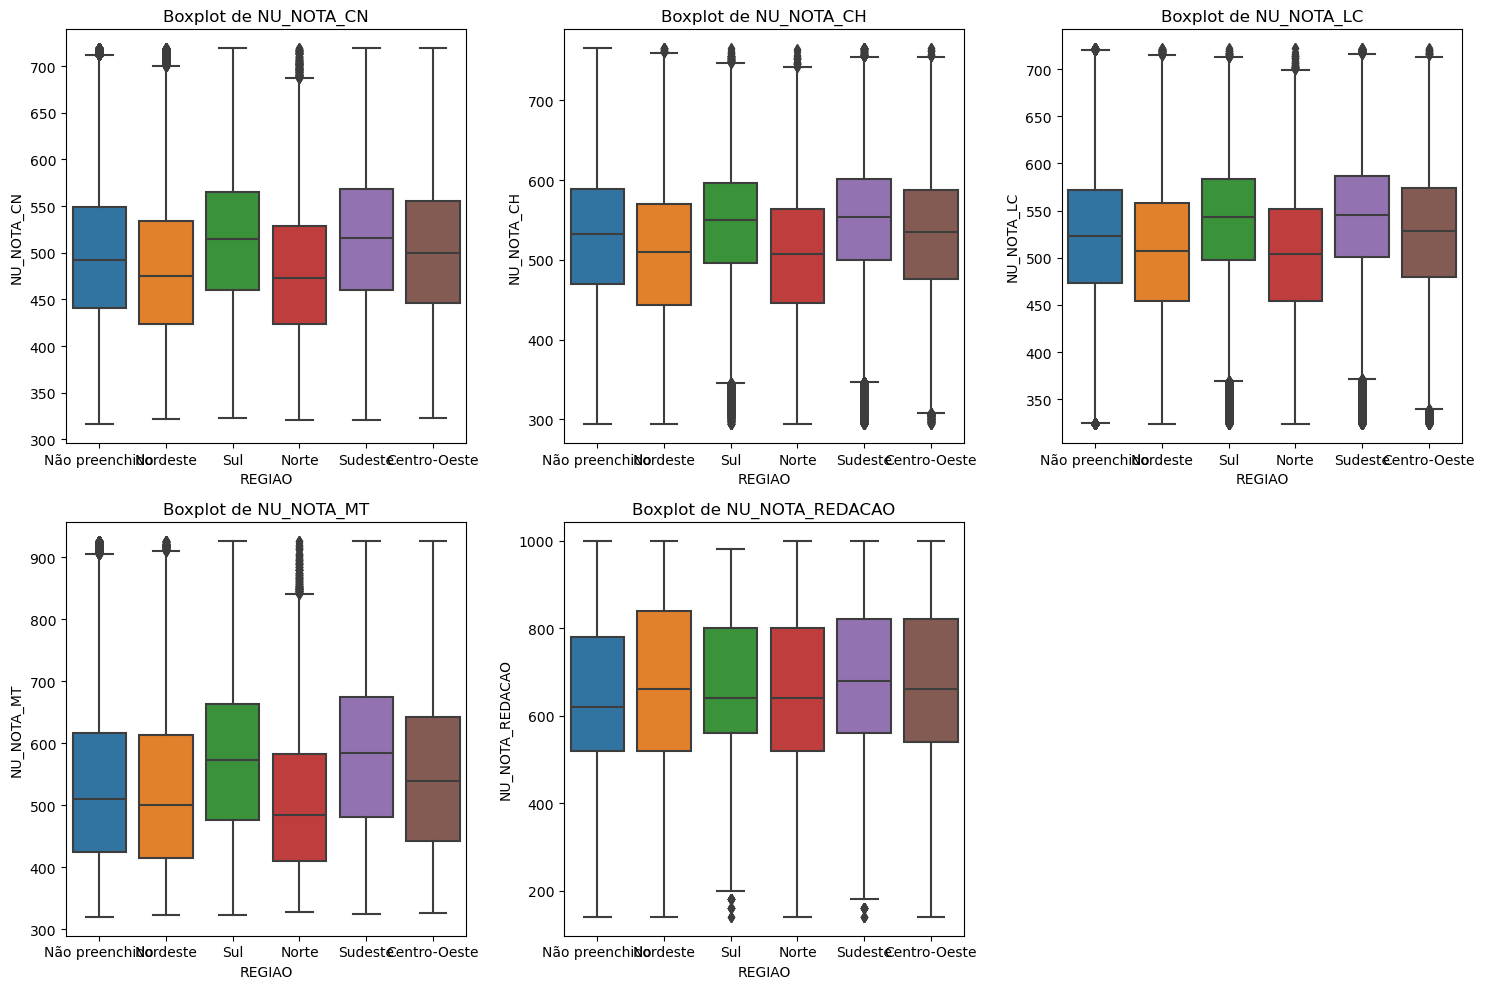

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de disciplinas
disciplinas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

# Definir o tamanho da figura
plt.figure(figsize=(15, 10))

# Gerar boxplots para cada disciplina
for i, disciplina in enumerate(disciplinas, 1):
    # Calcular os limites dos outliers
    Q1 = df[disciplina].quantile(0.25)
    Q3 = df[disciplina].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Criar o boxplot sem os outliers
    plt.subplot(2, 3, i)  # Organiza os gráficos em uma grade 2x3
    sns.boxplot(x='REGIAO', y=disciplina, data=df[(df[disciplina] >= limite_inferior) & (df[disciplina] <= limite_superior)])
    plt.title(f'Boxplot de {disciplina}')

# Ajustar o layout para não sobrepor os gráficos
plt.tight_layout()
plt.show()

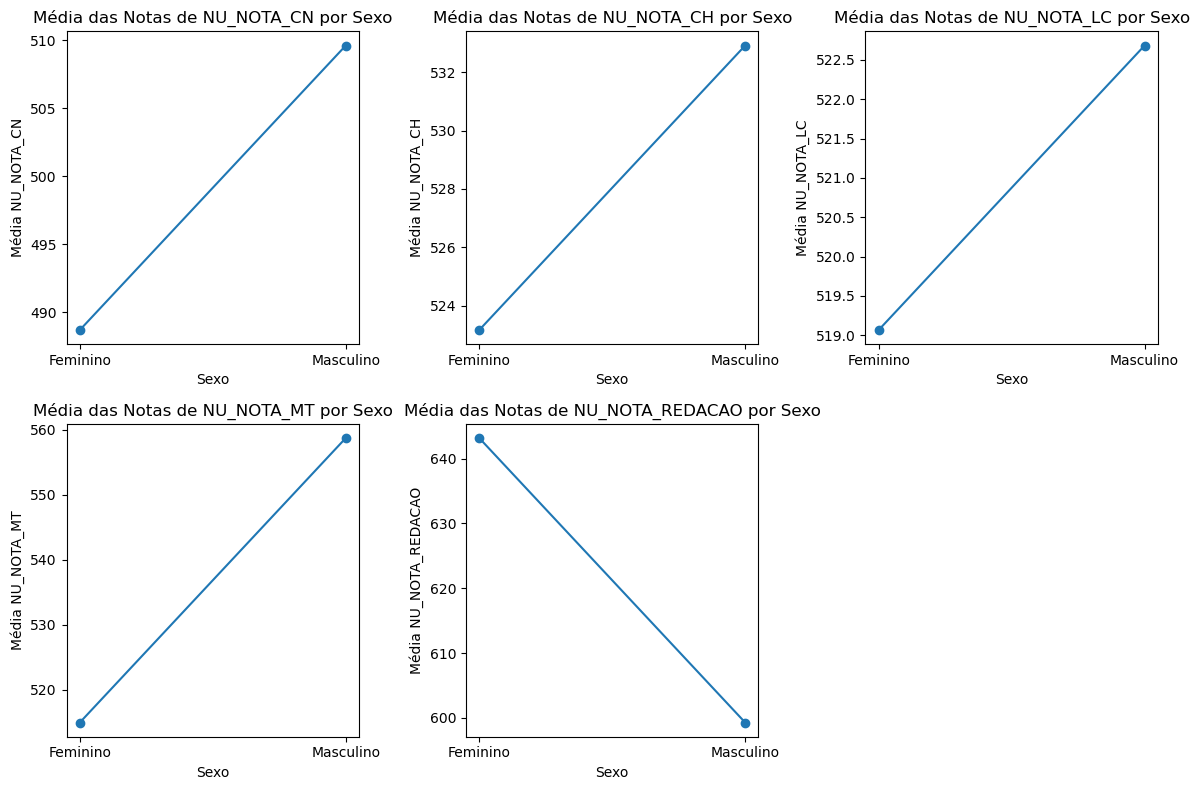

In [13]:
import matplotlib.pyplot as plt

# Lista de disciplinas
disciplinas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

# Configurar o gráfico
plt.figure(figsize=(12, 8))

# Criar o gráfico de linhas para cada disciplina
for i, disciplina in enumerate(disciplinas, 1):
    plt.subplot(2, 3, i)  # Organiza os gráficos em uma grade 2x3
    
    # Calcular a média das notas por SEXO para cada disciplina
    media_por_sexo = df.groupby('SEXO')[disciplina].mean()
    
    # Plotando as médias com um gráfico de linhas
    plt.plot(media_por_sexo.index, media_por_sexo.values, marker='o')
    
    # Adicionar título ao gráfico
    plt.title(f'Média das Notas de {disciplina} por Sexo')
    plt.xlabel('Sexo')
    plt.ylabel(f'Média {disciplina}')

plt.tight_layout()  # Ajusta o layout para não sobrepor os gráficos
plt.show()


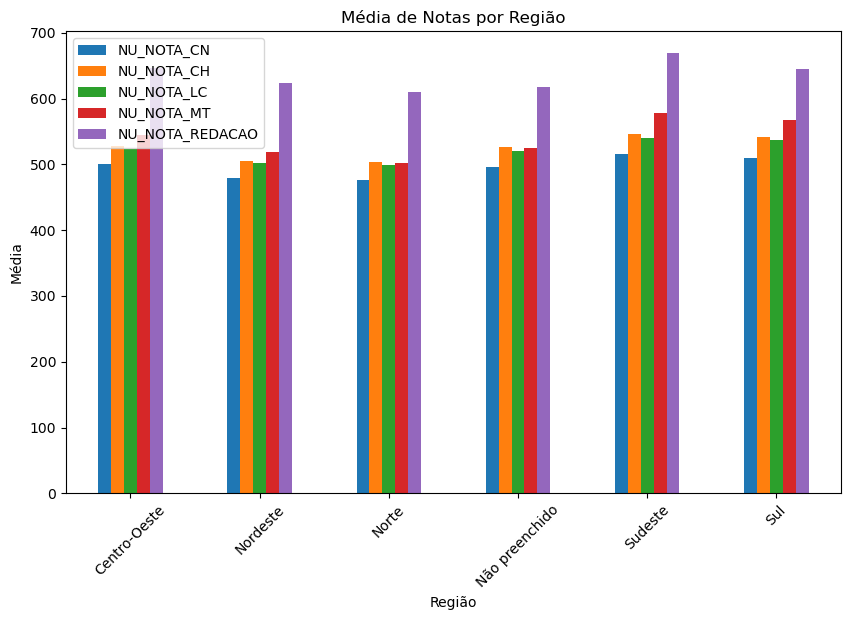

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

media_por_regiao = df.groupby('REGIAO')[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()

media_por_regiao.plot(kind='bar', figsize=(10, 6))
plt.title("Média de Notas por Região")
plt.ylabel("Média")
plt.xlabel("Região")
plt.xticks(rotation=45)
plt.show()

In [15]:
# Agrupar pelo tipo de escola e sexo, e calcular a média das notas
tipo_escola = df.groupby(['TIPO_ESCOLA', 'SEXO'])[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean()

# Exibir o resultado
print(tipo_escola)

                       NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
TIPO_ESCOLA SEXO                                                        
Estadual    Feminino   463.617195  499.097949  501.291538  486.458098   
            Masculino  480.774391  503.227830  500.539417  522.686143   
Federal     Feminino   518.711053  556.919221  549.290718  579.384524   
            Masculino  546.361936  568.283670  554.136582  631.423119   
Municipal   Feminino   474.423889  511.892301  510.729519  500.812842   
            Masculino  493.640888  515.206363  509.863551  543.653299   
Privada     Feminino   543.162796  576.072949  564.200586  616.751081   
            Masculino  556.727758  575.006045  557.741045  650.637492   

                       NU_NOTA_REDACAO  
TIPO_ESCOLA SEXO                        
Estadual    Feminino        606.209742  
            Masculino       543.341745  
Federal     Feminino        750.483324  
            Masculino       699.463094  
Municipal   Feminino   

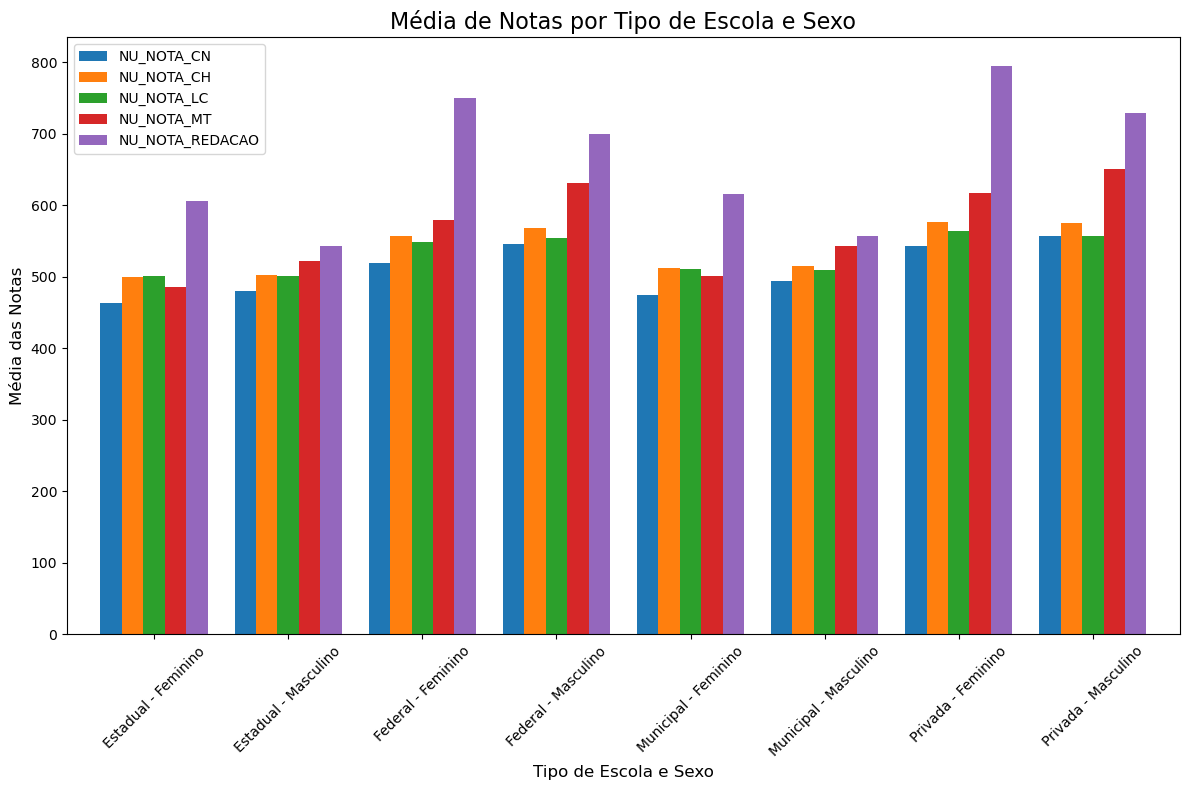

In [16]:
import matplotlib.pyplot as plt

# Agrupar pelo tipo de escola e sexo, e calcular a média das notas
tipo_escola = df.groupby(['TIPO_ESCOLA', 'SEXO'])[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean().reset_index()

# Criar uma nova coluna para combinar 'TIPO_ESCOLA' e 'SEXO' para o eixo x
tipo_escola['Tipo_Escola_Sexo'] = tipo_escola['TIPO_ESCOLA'] + ' - ' + tipo_escola['SEXO']

# Gerar o gráfico de barras
tipo_escola.plot(kind='bar', x='Tipo_Escola_Sexo', figsize=(12, 8), width=0.8)

# Adicionar título e rótulos
plt.title("Média de Notas por Tipo de Escola e Sexo", fontsize=16)
plt.ylabel("Média das Notas", fontsize=12)
plt.xlabel("Tipo de Escola e Sexo", fontsize=12)

# Ajustar a rotação das legendas do eixo X
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [25]:
# Calcular correlação entre as disciplinas
corr = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].corr()

# Exibir a matriz de correlação
print(corr)


                 NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  \
NU_NOTA_CN         1.000000    0.615178    0.599665    0.720745   
NU_NOTA_CH         0.615178    1.000000    0.765228    0.638280   
NU_NOTA_LC         0.599665    0.765228    1.000000    0.629340   
NU_NOTA_MT         0.720745    0.638280    0.629340    1.000000   
NU_NOTA_REDACAO    0.449901    0.492324    0.498577    0.515892   

                 NU_NOTA_REDACAO  
NU_NOTA_CN              0.449901  
NU_NOTA_CH              0.492324  
NU_NOTA_LC              0.498577  
NU_NOTA_MT              0.515892  
NU_NOTA_REDACAO         1.000000  
